# House Price

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# reading in data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Column names

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Linear regression on sales price and Lotarea

In [4]:
lotArea = train_data.iloc[:, [0,4]] # this will be our independent variable
salePrice = train_data.iloc[:, [0, -1]] # this will be our dependent variable

In [5]:
# linear regression
regressor = LinearRegression()
regressor.fit(lotArea, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

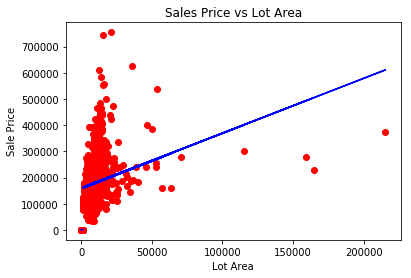

In [6]:
# visualize
plt.scatter(lotArea, salePrice, color='red') # plot all the points
plt.plot(lotArea, regressor.predict(lotArea), color='blue') # plot the regression line
plt.title('Sales Price vs Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

# Year built vs Sales prices

In [7]:
yearBuilt = train_data.iloc[:, [0,19]]
salePrice = train_data.iloc[:, [0, -1]]

In [8]:
# will determine how old house is by currentYear(2017) - yearBuilt
houseAge = []
yearBuiltMatrix = yearBuilt.as_matrix()
for row in range(len(yearBuiltMatrix)):
    houseAge.append([yearBuiltMatrix[row,0],2017 - yearBuiltMatrix[row,1]])

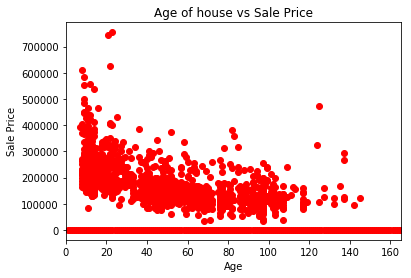

In [9]:
# visualize
plt.scatter(houseAge, salePrice, color='red')
plt.title('Age of house vs Sale Price')
plt.xlabel('Age')
plt.ylabel('Sale Price')
plt.xlim([0, 165])
plt.show()

# Multiple Regression

### Data preprocessing

In [10]:
# break train_data into dependent and independent columns
ind_dframe = train_data.iloc[:, 1:-1] # all the columns except sale price and ID
dep_dframe = train_data.iloc[:, -1] # sale price

# get dummies
ind_dframe = pd.get_dummies(ind_dframe)

# replave NA with the column mean
# NOTE: Might need to replace NA case-by-case
ind_dframe = ind_dframe.fillna(ind_dframe.mean())

# values of the data frame
ind = ind_dframe.values
dep = dep_dframe.values

# split into test and train sets
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.3, random_state = 0)

### Model

In [11]:
regressor = LinearRegression()
regressor.fit(ind_train, dep_train)

sale_predictions = regressor.predict(ind_test)

### Prediction

In [12]:
sale_predictions

array([ 252771.99752926,  148215.83415559,  111634.22703001,
        212462.3285468 ,   99442.98175797,   67354.00465271,
        261879.42973594,  136219.64287338,  453177.12416461,
        149391.48983622,  207722.18004109,   21146.19542747,
        235465.71044804,  105037.92518895,  111850.25493338,
        143026.70074593,  246708.94025429,  131182.91856839,
        150016.44587725,  185148.09699511,  138549.36886545,
        186229.40197132,  105191.14246218,  150462.75301664,
        186402.19613012,  159625.66728573,  163607.66265495,
         67863.14157389,  335937.55169943,  113422.08919996,
        151346.04252369,  199090.52658789,  141859.81203174,
        297959.21848201,  348313.11654058,  212547.80937035,
        300268.34772121,  123052.94940654,  234353.49552125,
        351874.69614527,  201592.1614008 ,  101172.82213787,
        193942.42199401,  297466.03869763,  375525.34356824,
        138643.96052655,   -7510.41022796,  139022.47311994,
        177285.58484775,

In [13]:
dep_test

array([200624, 133000, 110000, 192000,  88000,  85000, 282922, 141000,
       745000, 148800, 208900, 136905, 225000, 123000, 119200, 145000,
       190000, 123600, 149350, 155000, 166000, 144500, 110000, 174000,
       185000, 168000, 177500,  84500, 320000, 118500, 110000, 213000,
       156000, 250000, 372500, 175000, 277500, 112500, 263000, 325000,
       243000, 130000, 164990, 280000, 403000, 119000, 125000, 128200,
       172500,  84900, 412500, 156000, 167900, 100000, 275000, 123000,
       132000, 239900, 139000, 115000, 137500, 135000, 134450, 180500,
       193500, 156500, 132000, 224500, 139000, 225000, 188500, 118000,
        82000, 392000, 112000, 248900, 134500,  79500, 320000, 158000,
       140000, 136500, 107500, 145000, 200500, 185000, 105000, 202665,
       186000, 136000, 200500, 190000, 187500, 200000, 172500, 157000,
       213000, 185000, 124500, 162900, 260000, 198500, 120000, 159500,
       105900, 260000, 143000, 106500, 178900, 127000,  90350, 118500,
      

### Findings

In [14]:
# getting all coefficients
coef = pd.Series(regressor.coef_, index = ind_dframe.columns)

# gettings signifigant coefficients
sig_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

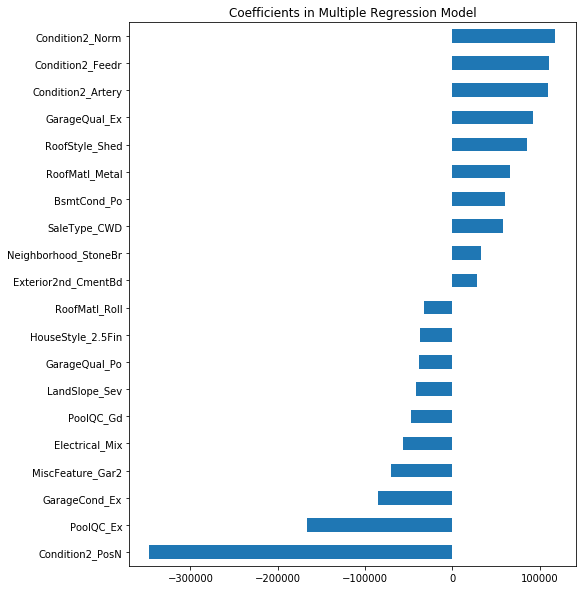

In [15]:
# graphing signifigant coefficients
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sig_coef.plot(kind = "barh")
plt.title("Coefficients in Multiple Regression Model")